In [ ]:
#  Implement Sobel and Canny edge detectors on sample industrial images

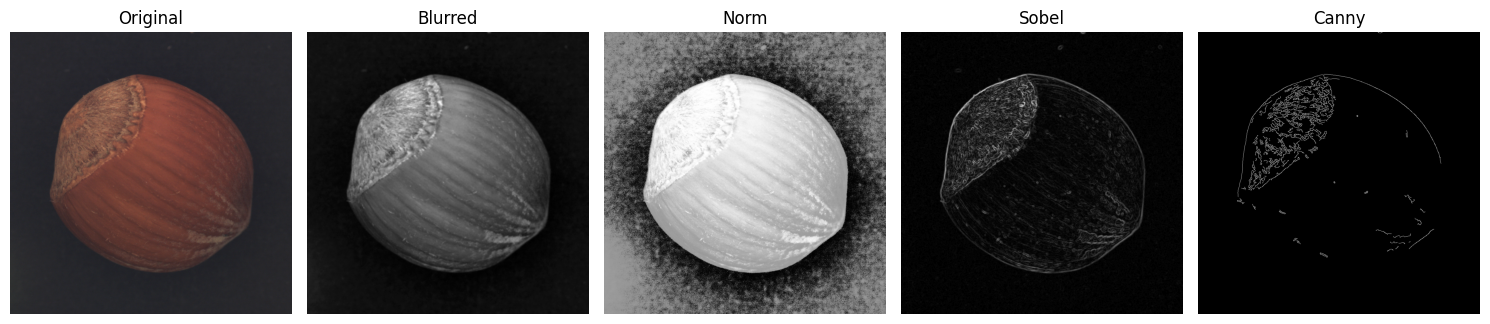

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("000.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur (to remove noise)
blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)
norm = cv2.equalizeHist(gray)

# Sobel Gradients
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)  # X direction
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)  # Y direction
sobel_combined = cv2.magnitude(sobelx, sobely)

v = np.median(blurred)
lower = int(max(0, 0.5 * v))
upper = int(min(255, 1.5 * v))
canny_auto = cv2.Canny(blurred, lower, upper)


edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

# Titles and images for plotting
titles = ["Original", "Blurred", "Norm", "SobelX", "SobelY", "Sobel", "Canny"]
images = [img, blurred, norm, sobelx, sobely, sobel_combined, canny_auto]

# Plot results
plt.figure(figsize=(15, 6))
for i in range(len(images)):
    plt.subplot(1, 5, i+1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
#  Apply morphological opening and closing to clean binary masks

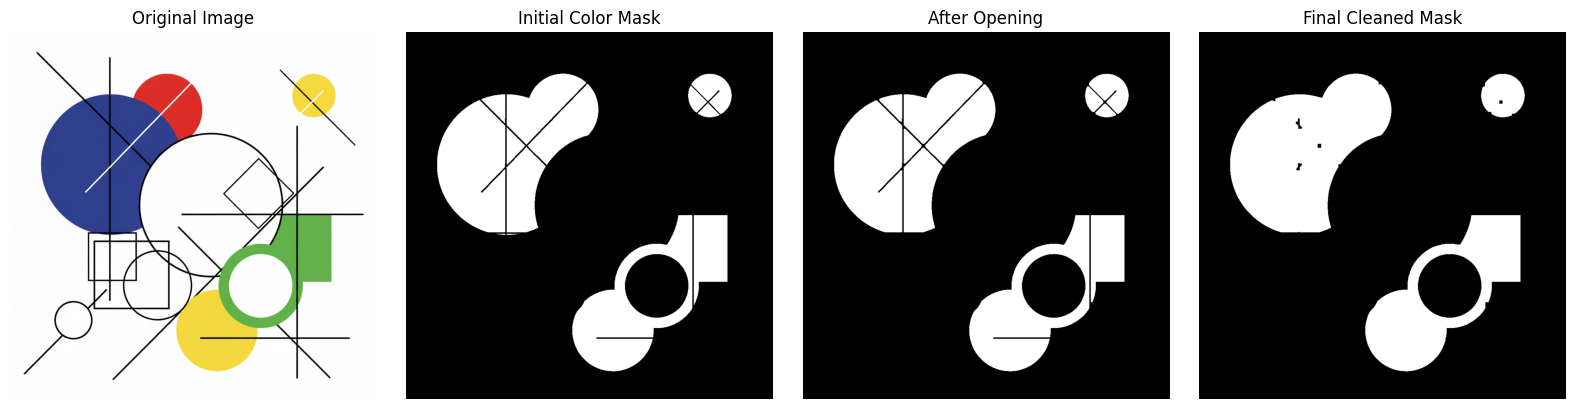

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load BGR image
image = cv2.imread('shape1.png')  # Replace with your image file
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create a mask for all non-background pixels

lower_bound = np.array([0, 50, 50])    # H, S, V lower bound
upper_bound = np.array([180, 255, 255])  # H, S, V upper bound

# Create mask of all colored regions
mask = cv2.inRange(hsv, lower_bound, upper_bound)

# Morphological operations to clean noise
kernel = np.ones((5, 5), np.uint8)

# Opening removes small white noise
opened = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Closing fills small holes in the objects
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# Show results
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Initial Color Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("After Opening")
plt.imshow(opened, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Final Cleaned Mask")
plt.imshow(closed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Perform defect segmentation using Otsu and adaptive thresholding

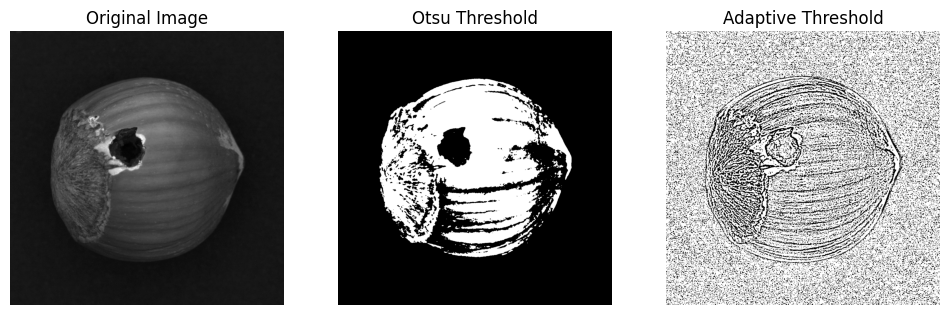

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("017.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Preprocessing - Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5,5), 0)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
img_eq = clahe.apply(blur)

# Otsu's Thresholding
_, otsu_thresh = cv2.threshold(img_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    img_eq, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2
)

# Show results
titles = ['Original Image', 'Otsu Threshold', 'Adaptive Threshold']
images = [gray, otsu_thresh, adaptive_thresh]

plt.figure(figsize=(12,5))
for i in range(3):
    plt.subplot(1,3,i+1), plt.imshow(images[i], cmap='gray')
    plt.title(titles[i]), plt.axis('off')
plt.show()

In [ ]:
#  Extract SIFT/ORB features for part identification or alignment tasks

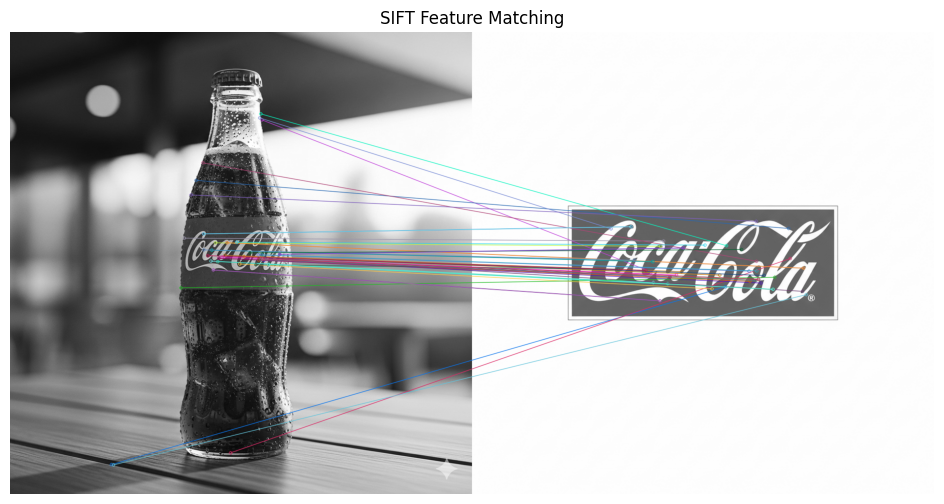

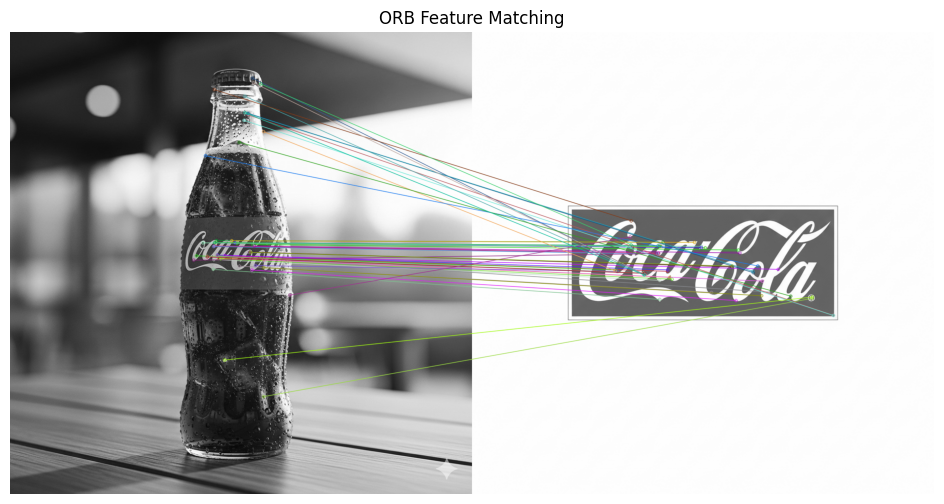

In [ ]:
import cv2
import matplotlib.pyplot as plt

def feature_matching(img1_path, img2_path, method="SIFT"):
    # Load images in grayscale
    image1 = cv2.imread(img1_path)
    img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.imread(img2_path)
    img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    if img1 is None or img2 is None:
        raise ValueError("Image path invalid or image not found.")

    # Choose feature detector
    if method == "SIFT":
        detector = cv2.SIFT_create()
    elif method == "ORB":
        detector = cv2.ORB_create(nfeatures=1000)
    else:
        raise ValueError("Choose method as 'SIFT' or 'ORB'")

    # Detect keypoints and compute descriptors
    kp1, des1 = detector.detectAndCompute(img1, None)
    kp2, des2 = detector.detectAndCompute(img2, None)

    # Match descriptors
    if method == "SIFT":
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    else:  # ORB
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw top matches
    result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None,
                             flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12,6))
    plt.imshow(result)
    plt.title(f"{method} Feature Matching")
    plt.axis('off')
    plt.show()

    return matches, kp1, kp2

# Example usage
matches, kp1, kp2 = feature_matching("cola.png", "temp.png", method="SIFT")
matches, kp1, kp2 = feature_matching("cola.png", "temp.png", method="ORB")

In [ ]:
#Apply spatial filtering to enhance the surface of an automotive part image and highlight scratches or dents.

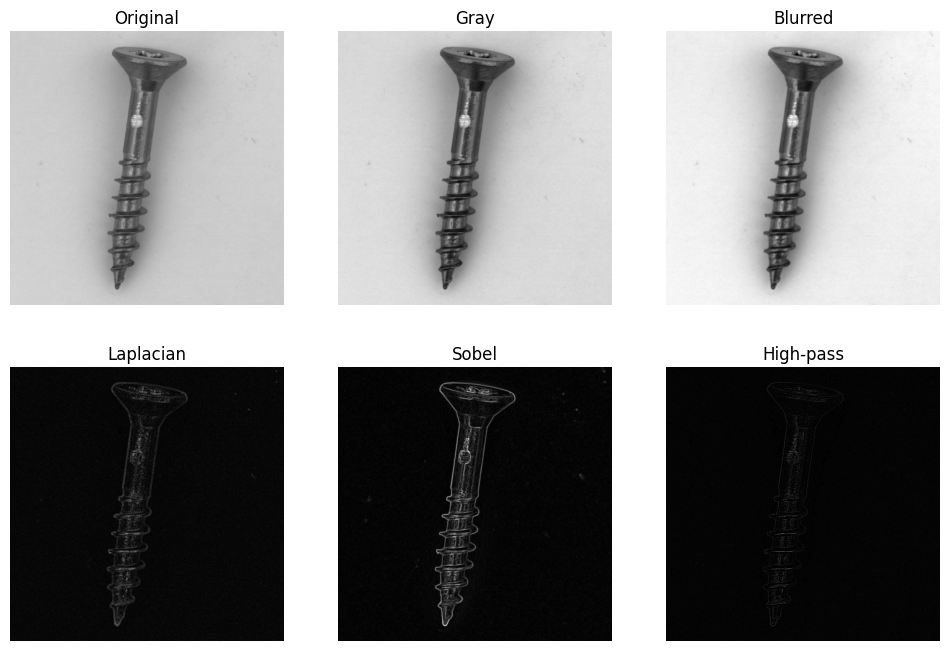

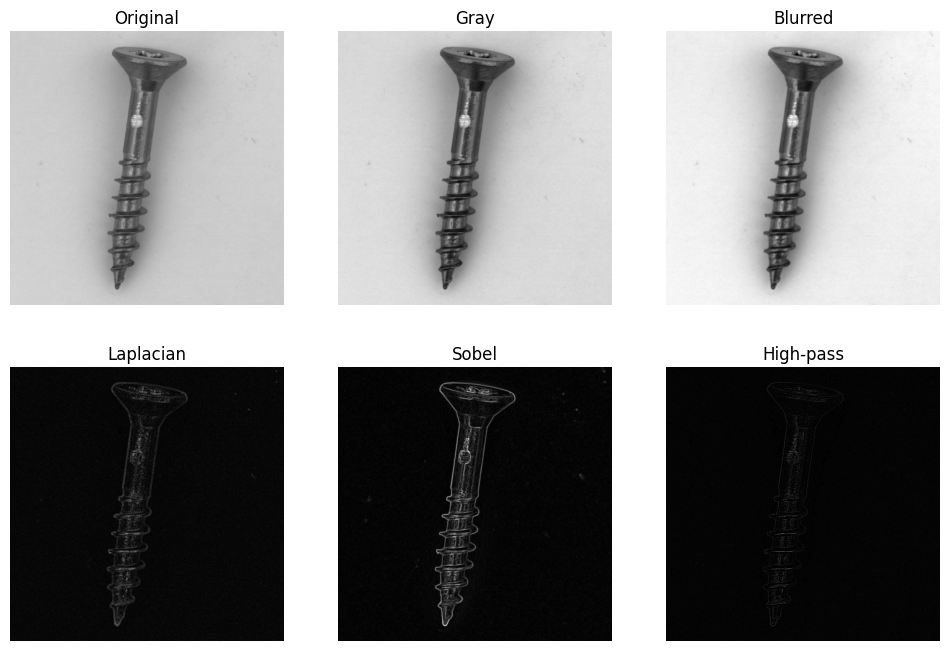

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your automotive part image

img = cv2.imread("003.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur (to remove noise)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Laplacian filter (to detect surface scratches/dents)
laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3)
laplacian = cv2.convertScaleAbs(laplacian)

# Sobel filters (highlight horizontal/vertical scratches)
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Step 6: High-pass filtering (to enhance fine details)
kernel = np.array([[-1,-1,-1],
                   [-1, 8,-1],
                   [-1,-1,-1]])
highpass = cv2.filter2D(gray, -1, kernel)

# Show results
titles = ["Original", "Gray", "Blurred", "Laplacian", "Sobel", "High-pass"]
images = [img, gray, blurred, laplacian, sobel_combined, highpass]

plt.figure(figsize=(12,8))
for i in range(len(images)):
    plt.subplot(2,3,i+1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")
plt.show()


In [ ]:
# Implement Sobel, Canny, and Laplacian edge detectors on bridge/concrete images to detect cracks. Compare their effectiveness

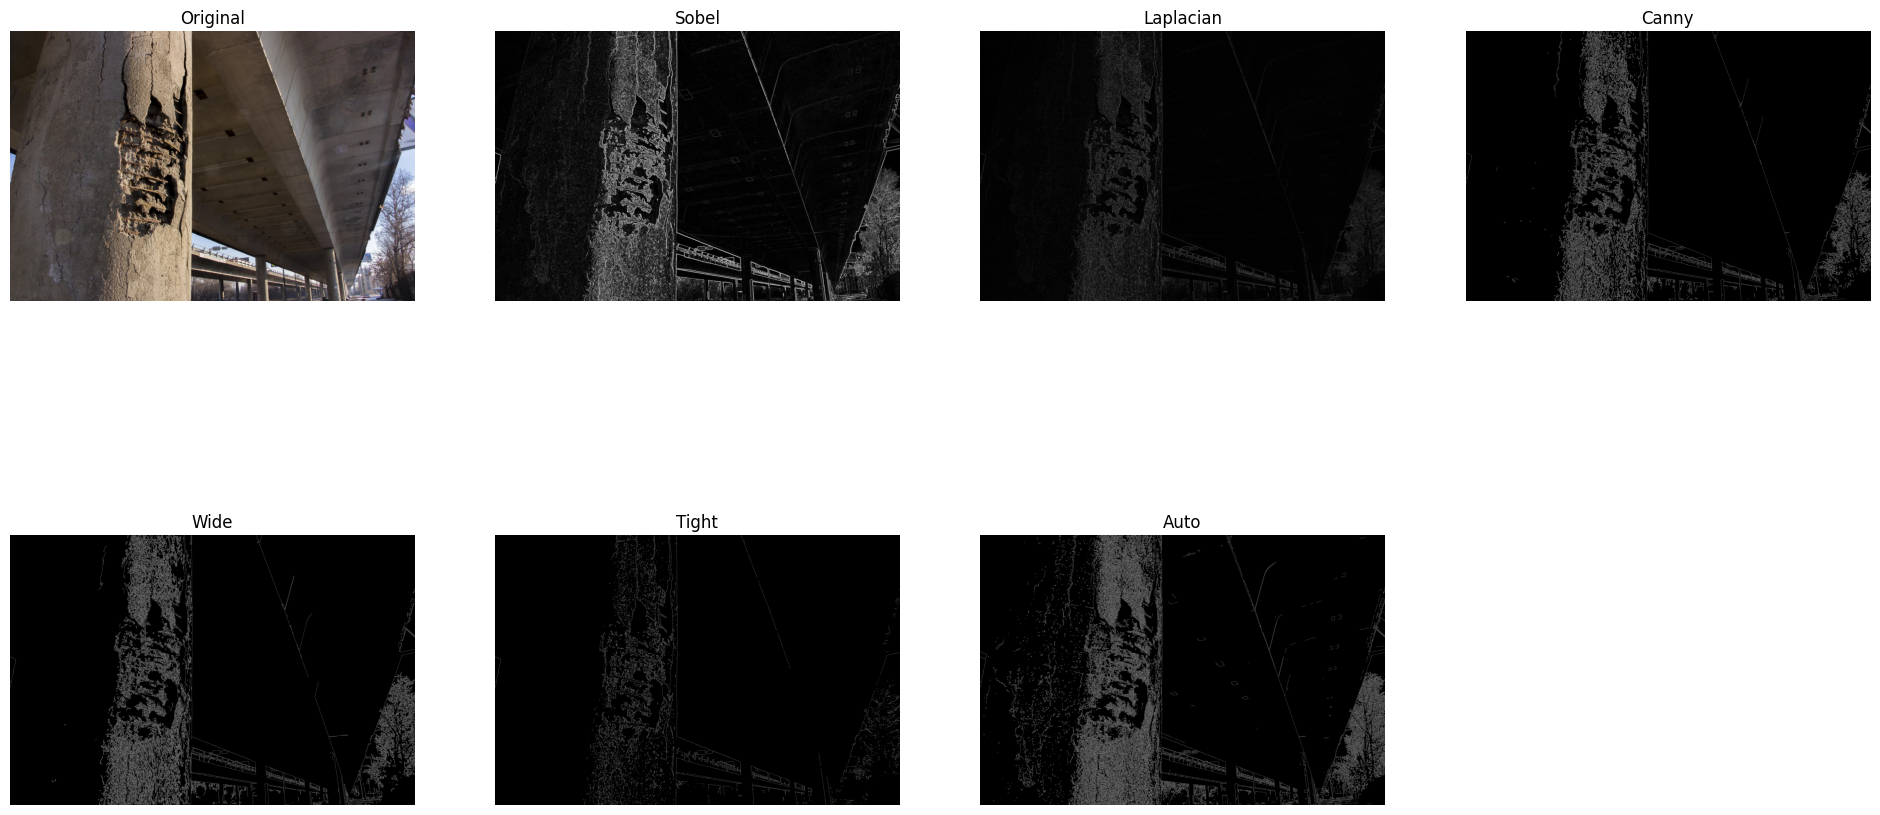

-1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils                      # autocanny from cv2

#  Load Image (upload your bridge/concrete crack image)
img = cv2.imread("bridge_concrete.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#  Noise reduction (important for cracks)
#  Use (5, 5) for noisy, high-resolution images.

#  Always use an odd kernel size for Gaussian blurs so the central pixel is well-defined.

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#  Sobel Edge Detector (detects directional cracks)
#  Computes gradients in the X and Y directions.

sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)

# Laplacian Edge Detector (detects fine cracks in all directions)
laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3)
laplacian = cv2.convertScaleAbs(laplacian)

# Canny Edge Detector (strong crack localization) use two threshold
canny = cv2.Canny(blurred, threshold1=50, threshold2=150)

#  Use (3, 3) for smaller, less noisy images or where edge sharpness must be retained.
blurred1 = cv2.GaussianBlur(gray, (3, 3), 0)

# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred1, 10, 200)
tight = cv2.Canny(blurred1, 225, 250)
auto = imutils.auto_canny(blurred1)

#  Display all results
titles = ["Original", "Sobel", "Laplacian", "Canny", "Wide", "Tight", "Auto"]
images = [img, sobel, laplacian, canny, wide, tight, auto]

plt.figure(figsize=(24,12))
for i in range(len(images)):
    plt.subplot(2,4,i+1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap="gray")
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")
plt.show()

cv2.waitKey(0)

In [ ]:
#  Use morphological operations (opening/closing) to isolate defective regions in a fabric image

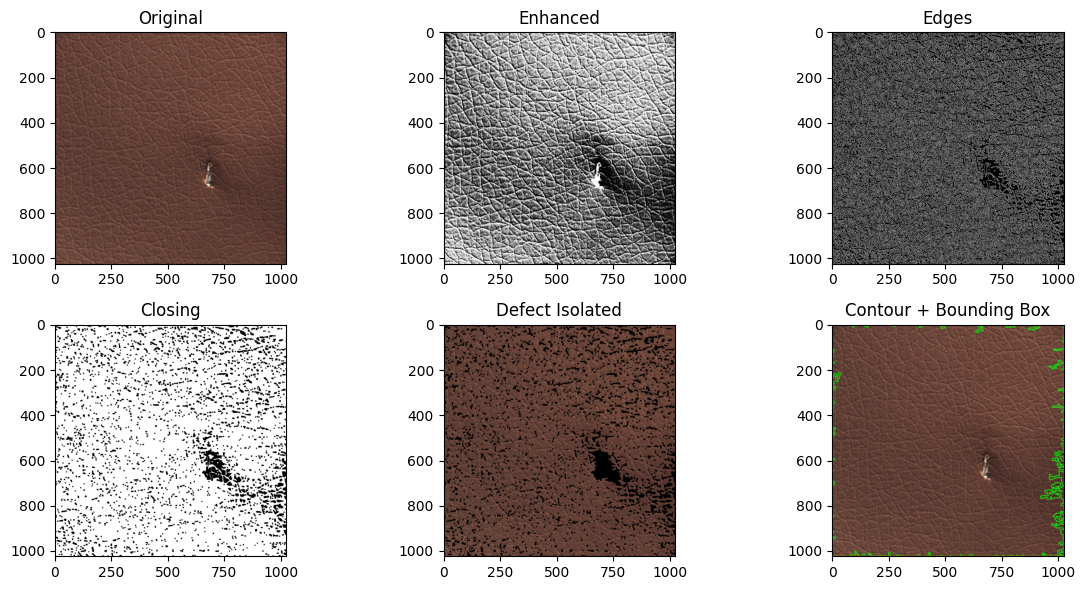

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("007.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Enhance contrast
enhanced = cv2.equalizeHist(gray)

# Edge detection
edges = cv2.Canny(enhanced, 50, 150)

# Morphological closing (fill gaps)
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Threshold to binary
_, binary = cv2.threshold(closing, 30, 255, cv2.THRESH_BINARY)

# Morphological opening (remove noise)
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Keep largest connected component (main defect)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opened, connectivity=8)
if num_labels > 1:
    largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
    defect_mask = np.uint8(labels == largest_label) * 255
else:
    defect_mask = opened

# Apply mask to original image
defect_isolated = cv2.bitwise_and(img, img, mask=defect_mask)

# -------- Draw Contours -------- #
contours, _ = cv2.findContours(defect_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contour = img.copy()
cv2.drawContours(img_contour, contours, -1, (0,255,0), 2)   # Green contour
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img_contour, (x,y), (x+w, y+h), (0,0,255), 2)  # Red bounding box

# Plot results
plt.figure(figsize=(12,6))
plt.subplot(231), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original")
plt.subplot(232), plt.imshow(enhanced, cmap="gray"), plt.title("Enhanced")
plt.subplot(233), plt.imshow(edges, cmap="gray"), plt.title("Edges")
plt.subplot(234), plt.imshow(closing, cmap="gray"), plt.title("Closing")
plt.subplot(235), plt.imshow(cv2.cvtColor(defect_isolated, cv2.COLOR_BGR2RGB)), plt.title("Defect Isolated")
plt.subplot(236), plt.imshow(cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB)), plt.title("Contour + Bounding Box")
plt.tight_layout()
plt.show()


In [ ]:
# Apply global, adaptive, and Otsu thresholding on metal surface images to separate defective vs. non-defective regions. Provide comparative results

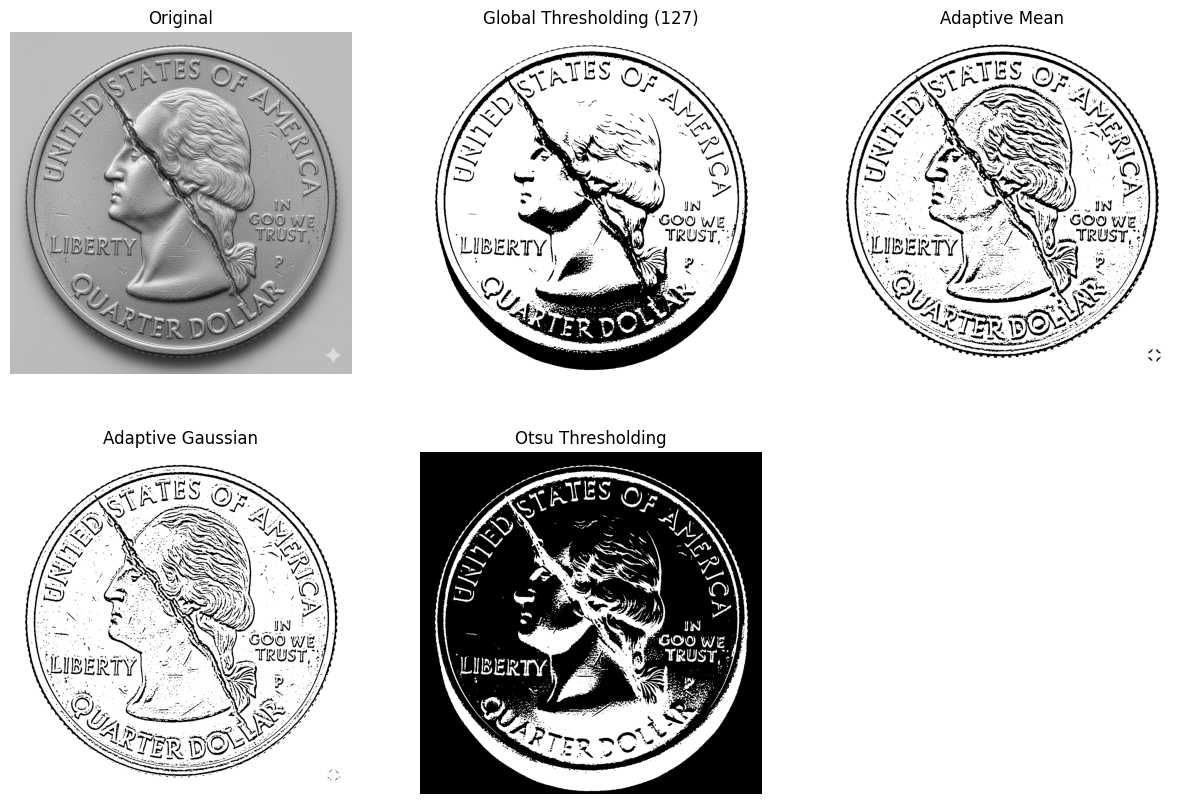

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load metal surface image (replace with your file name)
img = cv2.imread("coin.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5,5), 0)

# Global Thresholding (fixed threshold = 127)
_, global_thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_mean = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=25, C=10)

adaptive_gaussian = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=25, C=10)

# Otsu’s Thresholding (automatically chooses optimal threshold)
_, otsu_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Display results for comparison
titles = ["Original",
          "Global Thresholding (127)",
          "Adaptive Mean",
          "Adaptive Gaussian",
          "Otsu Thresholding"]

images = [gray, global_thresh, adaptive_mean, adaptive_gaussian, otsu_thresh]

plt.figure(figsize=(15,10))
for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.show()


In [ ]:
# Develop a color-based thresholding method (HSV space) to classify fruits as ripe or unripe. Test on at least 5 samples.

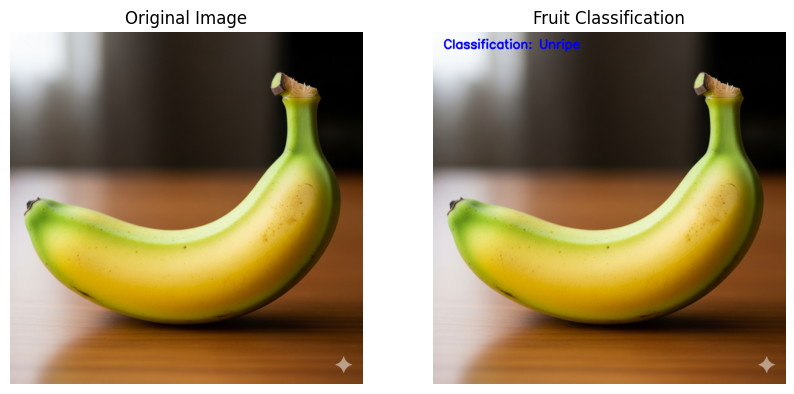

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the apple image
img = cv2.imread("banana.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define HSV ranges
# Ripe: red hues
ripe_lower1 = np.array([0, 100, 100])
ripe_upper1 = np.array([10, 255, 255])
ripe_lower2 = np.array([160, 100, 100])
ripe_upper2 = np.array([179, 255, 255])

# Unripe: green hues
unripe_lower = np.array([35, 50, 50])
unripe_upper = np.array([85, 255, 255])

# Create masks
mask_ripe1 = cv2.inRange(hsv, ripe_lower1, ripe_upper1)
mask_ripe2 = cv2.inRange(hsv, ripe_lower2, ripe_upper2)
mask_ripe = cv2.bitwise_or(mask_ripe1, mask_ripe2)

mask_unripe = cv2.inRange(hsv, unripe_lower, unripe_upper)

# Count pixels in each category
ripe_pixels = cv2.countNonZero(mask_ripe)
unripe_pixels = cv2.countNonZero(mask_unripe)

# Decision
if ripe_pixels > unripe_pixels:
    label = "Ripe"
    color = (0, 255, 0)  # Green text
else:
    label = "Unripe"
    color = (0, 0, 255)  # Red text

# Annotate result
result = img_rgb.copy()
cv2.putText(result, f"Classification: {label}", (30, 50),
            cv2.FONT_HERSHEY_SIMPLEX, 1.2, color, 3)

# Show results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Fruit Classification")
plt.axis("off")
plt.show()


In [ ]:
# Apply connected component labeling to count defective vs. good solder joints on PCB images. Provide statistics of the results

Total solder joints: 8
Good joints: 4
Defective joints: 4


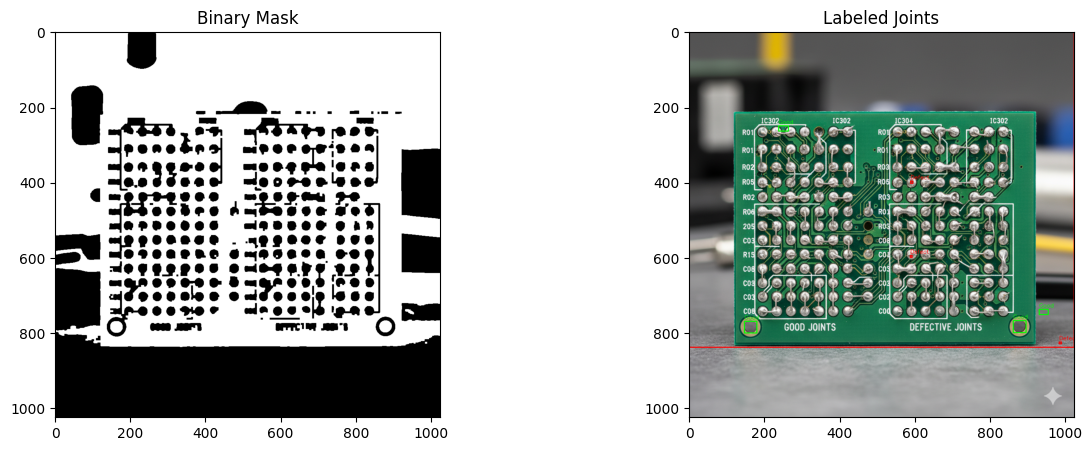

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load PCB image
img = cv2.imread("pcb.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Preprocessing
blur = cv2.GaussianBlur(gray, (5,5), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Morphology
kernel = np.ones((3,3), np.uint8)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel, iterations=2)

# Connected Component Labeling
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned, connectivity=8)

output = img.copy()
good, defective = 0, 0

for i in range(1, num_labels):  # skip background
    x, y, w, h, area = stats[i]
    cx, cy = centroids[i]

    # Shape features
    aspect_ratio = w / float(h + 1e-5)
    circularity = 4*np.pi*area / (w*h + 1e-5)

    # Classification rules
    if 50 < area < 2000 and 0.5 < aspect_ratio < 2.0 and circularity > 0.5:
        color, label = (0,255,0), "Good"
        good += 1
    else:
        color, label = (0,0,255), "Defect"
        defective += 1

    cv2.rectangle(output, (x,y), (x+w, y+h), color, 2)
    cv2.putText(output, label, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, color, 1, cv2.LINE_AA)

# Statistics
total = good + defective
print(f"Total solder joints: {total}")
print(f"Good joints: {good}")
print(f"Defective joints: {defective}")

# Show results
plt.figure(figsize=(15,5))
plt.subplot(1,2,1); plt.imshow(cleaned, cmap="gray"); plt.title("Binary Mask")
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)); plt.title("Labeled Joints")
plt.show()


In [ ]:
# Design a pipeline using edge detection + morphology to detect cracks or missing parts in glass bottle images. Show defect localization.

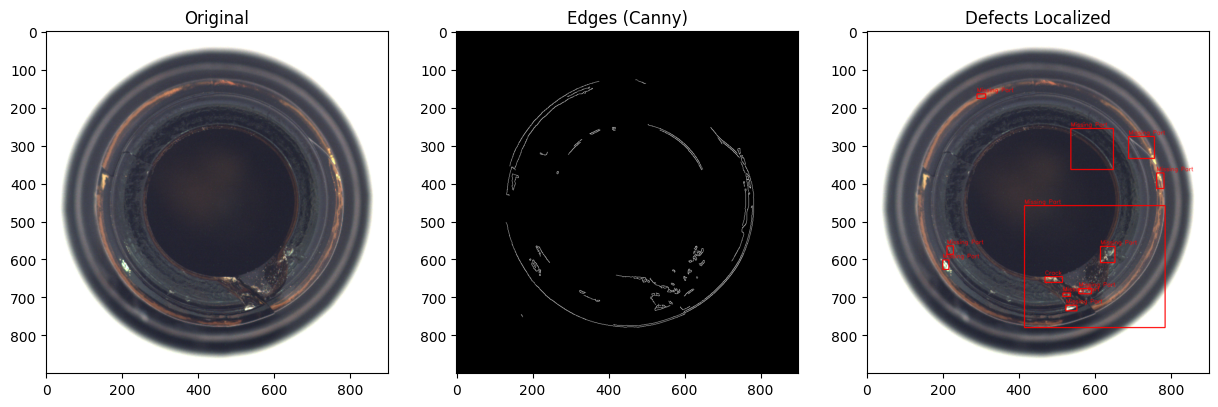

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("008.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Preprocessing
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Edge detection
edges = cv2.Canny(blur, 50, 150)

# Morphological ops
kernel = np.ones((3,3), np.uint8)
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=1)

# Contour detection
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = img.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    area = cv2.contourArea(cnt)
    aspect_ratio = float(w)/h if h!=0 else 0

    # Rule: consider mid-size irregular shapes
    if area > 100 and area < 5000:
        if aspect_ratio > 3 or aspect_ratio < 0.3:
            label = "Crack"
        else:
            label = "Missing Part"

        cv2.rectangle(output, (x,y), (x+w,y+h), (0,0,255), 2)
        cv2.putText(output, label, (x,y-5), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0,0,255), 1, cv2.LINE_AA)

# Display
plt.figure(figsize=(15,6))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(edges, cmap='gray'); plt.title("Edges (Canny)")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)); plt.title("Defects Localized")
plt.show()


In [ ]:
# Perform defect detection on PCB images using edge detection and morphology to identify broken tracks or missing solder points. Provide annotated outputs.

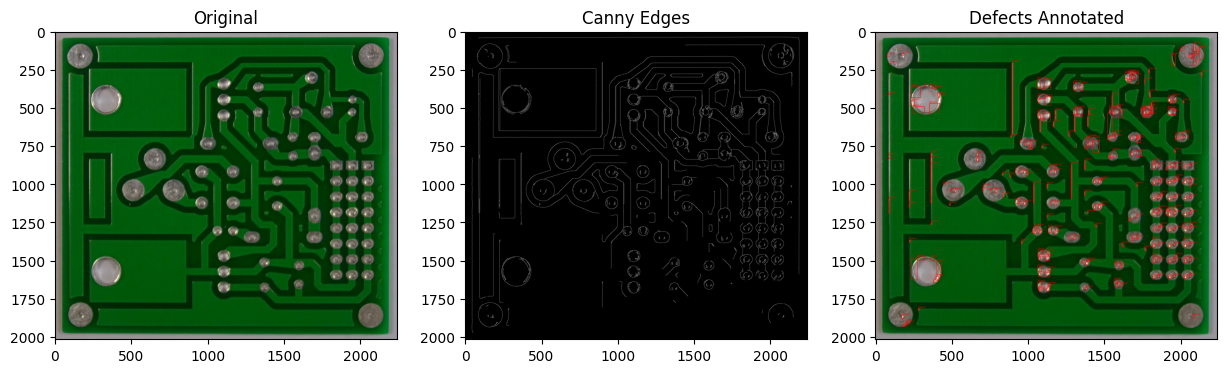

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load PCB image
img = cv2.imread("pcb.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Noise reduction
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Edge detection
edges = cv2.Canny(blur, 50, 150)

# Morphological operations
kernel = np.ones((3,3), np.uint8)
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)  # fill gaps
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=1)  # remove noise

# Find contours (potential defects)
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = img.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Filter very small regions (noise)
    if w*h > 50 and w*h < 5000:
        cv2.rectangle(output, (x, y), (x+w, y+h), (0,0,255), 2)
        cv2.putText(output, "Defect", (x, y-5), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0,0,255), 1, cv2.LINE_AA)

# Display results
plt.figure(figsize=(15,6))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(edges, cmap='gray'); plt.title("Canny Edges")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)); plt.title("Defects Annotated")
plt.show()
